
# Homework 3 - Problemi inversi e imaging
Questo homework utilizza anche il pacchetto InverseProblems scaricabile
dal sito di Virtuale del corso.

## 2. Image deblur - KERNEL (21,5)

Scegliere una immagine a piacere (no cameraman!!!) in scala di grigi ed
eseguire i seguenti punti:
- Creare un problema test

In [1]:
from ProblemiInversi import examples ,operators ,solvers ,utilities
import numpy as np
import matplotlib.pyplot as plt

from skimage import data

# Lettura dei dati da skimage
x = data.checkerboard()
nx, ny = x.shape

# Normalizzo l'immagine portandola in una scala [0,1]
x = x / x.max()

#kernel_list=[(11,3),(21,5)] #(k,sigma)

#diversi livelli di rumore nell’intervallo[0, 0.01]
noise_lvl_list = [0, 0.0001, 0.001 ,0.01]
#conterrà le immagini corrotte dai vari livelli li rumore
y_delta_list= []

# Definizione kernel di blur(dimensione K x k e derivazione standard sigma)
# e operatore associato   
kernel = utilities.gaussian2d_kernel(k=21, sigma=5)
A = operators.ConvolutionOperator(kernel)

# Sfocatura dell'immagine x con operatore di convoluzione A 
y = A(x)    
#aggiunta del rumore a y
for i, noise_level in enumerate(noise_lvl_list):
    y_delta = y + utilities.gaussian_noise(y, noise_level)
    y_delta_list.append(y_delta)


- Calcolare la soluzione naive risolvendo il problema di minimi quadrati
con CGLS


===NOISE = 0===
ER   = 0.17577637042392297
PSNR = 18.302023642694653
SSIM = 0.3593942444714777

===NOISE = 0.0001===
ER   = 0.1776472326524448
PSNR = 18.210064563048874
SSIM = 0.35874035749177774

===NOISE = 0.001===
ER   = 0.18699077511467424
PSNR = 17.764829856745862
SSIM = 0.3433822152170027

===NOISE = 0.01===
ER   = 0.711284572026349
PSNR = 6.160365717353423
SSIM = 0.1320844765655489


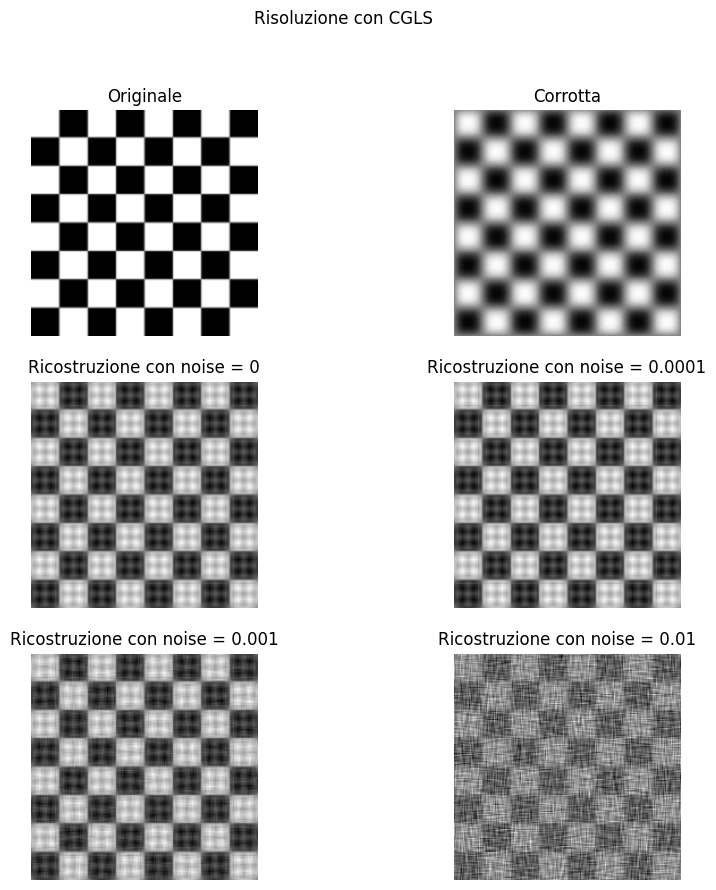

In [2]:
#Calcolo della soluzione NAIVE come soluzione del problema dei minimi quadrati
# con le equazioni normali

# CGLS
cgls_solver = solvers.CGLS(A)

# Scelta di x0, kmax, atolf, tolx
x0 = np.zeros_like(x)
kmax = 200
tolf = 1e-8
tolx = 1e-8

#contenitore delle soluzioni
x_cgls_list=[]

#soluzione con diversi livelli di rumore nell’intervallo[0, 0.01]
for i, noise_level in enumerate(noise_lvl_list):
    #y_delta_list[i] è il vettore dei dati osservati. immagine sfocata + rumore
    x_cgls = cgls_solver.solve(y_delta_list[i], x0, kmax, tolf, tolx)
    x_cgls_list.append(x_cgls)
    
    print(f'\n===NOISE = {noise_level}===')
    print('ER   =',utilities.rel_err(x_cgls,x))
    print('PSNR =',utilities.psnr(x_cgls,x))
    print('SSIM =',utilities.ssim(x_cgls,x))

#plot grafici
plt.figure(figsize=(10,10))
plt.suptitle("Risoluzione con CGLS")

plt.subplot(3, 2, 1)
plt.imshow(x, cmap="gray")
plt.title("Originale")
plt.axis("off")

plt.subplot(3, 2, 2)
plt.imshow(y_delta_list[i], cmap="gray")
plt.axis("off")
plt.title("Corrotta")

for i, noise_level in enumerate(noise_lvl_list):
    # Visualizzazione ricostruzione
    plt.subplot(3, 2, 3+i)
    plt.imshow(x_cgls_list[i], cmap="gray")
    plt.axis("off")
    plt.title(f"Ricostruzione con noise = {noise_level}")

    
plt.show()        


- Calcolare la soluzione regolarizzata con Tikhonov. 
- Calcolare il valore di λ sia con il principio di Massima Discrepanza che come valore
che minimizza l’errore assoluto fra l’immagine ground truth e la ricostruzione 
(su una griglia di valori di λ), 
visualizzando il grafico
relativo.




=== Tikhonov: Noise = 0 =========

---lmbda = 1.000e-04---
ER   = 0.17578118356956118
PSNR = 18.30178580708934
SSIM = 0.359401987251009

---lmbda = 2.783e-04---
ER   = 0.1758135828482969
PSNR = 18.300185006468134
SSIM = 0.35945095215203476

---lmbda = 7.743e-04---
ER   = 0.17600955287478848
PSNR = 18.29050870024673
SSIM = 0.3598257040040611

---lmbda = 2.154e-03---
ER   = 0.1775212338209933
PSNR = 18.216227339836415
SSIM = 0.3621788079737499

---lmbda = 5.995e-03---
ER   = 0.1869922880072002
PSNR = 17.76475958181199
SSIM = 0.36813876779565297

---lmbda = 1.668e-02---
ER   = 0.21852129103358117
PSNR = 16.411358340199516
SSIM = 0.35753741401233186

---lmbda = 4.642e-02---
ER   = 0.2445696437986958
PSNR = 15.43318247325284
SSIM = 0.34457161877572073

---lmbda = 1.292e-01---
ER   = 0.2763108672831565
PSNR = 14.373274173470541
SSIM = 0.35728741433519673

---lmbda = 3.594e-01---
ER   = 0.3695602374110853
PSNR = 11.847528745134518
SSIM = 0.25893336254246907

---lmbda = 1.000e+00---
ER   = 0.

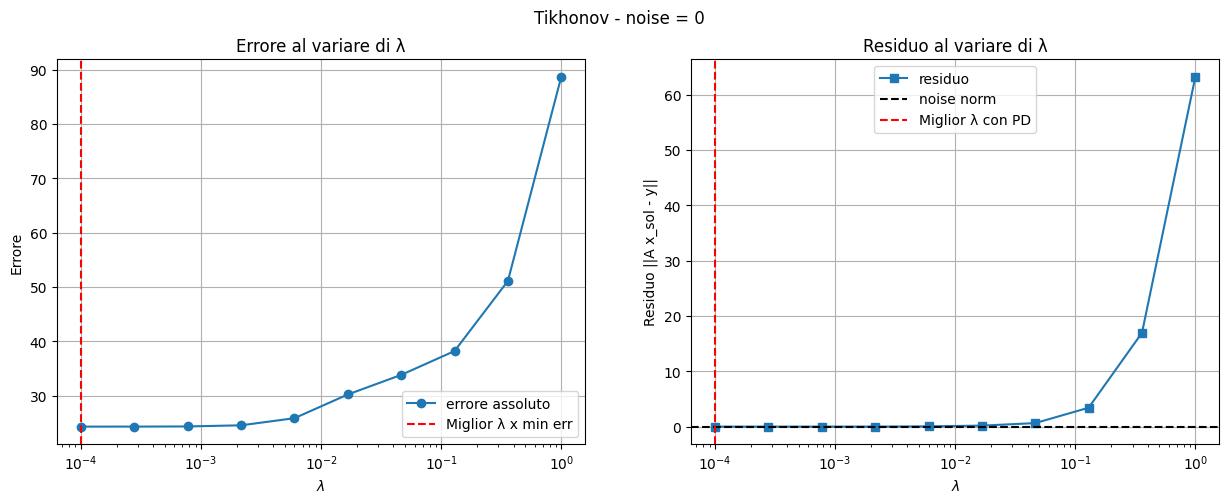


=== Tikhonov: Noise = 0.0001 =========

---lmbda = 1.000e-04---
ER   = 0.1776485652341766
PSNR = 18.209999407998207
SSIM = 0.35874743336279946

---lmbda = 2.783e-04---
ER   = 0.1776647480705416
PSNR = 18.20920820583645
SSIM = 0.35879522824011606

---lmbda = 7.743e-04---
ER   = 0.1777884484154164
PSNR = 18.20316269774835
SSIM = 0.3591563851380944

---lmbda = 2.154e-03---
ER   = 0.17880984555112595
PSNR = 18.15340493272716
SSIM = 0.3615068566002742

---lmbda = 5.995e-03---
ER   = 0.18713048134974342
PSNR = 17.758342799541825
SSIM = 0.3679292547328856

---lmbda = 1.668e-02---
ER   = 0.2185154999696508
PSNR = 16.411588529250988
SSIM = 0.3574735586168418

---lmbda = 4.642e-02---
ER   = 0.24456827443982773
PSNR = 15.433231106162124
SSIM = 0.344572677430162

---lmbda = 1.292e-01---
ER   = 0.2763104783881028
PSNR = 14.373286398476122
SSIM = 0.35728835545630816

---lmbda = 3.594e-01---
ER   = 0.3695603616081968
PSNR = 11.847525826091523
SSIM = 0.25893378182700355

---lmbda = 1.000e+00---
ER   

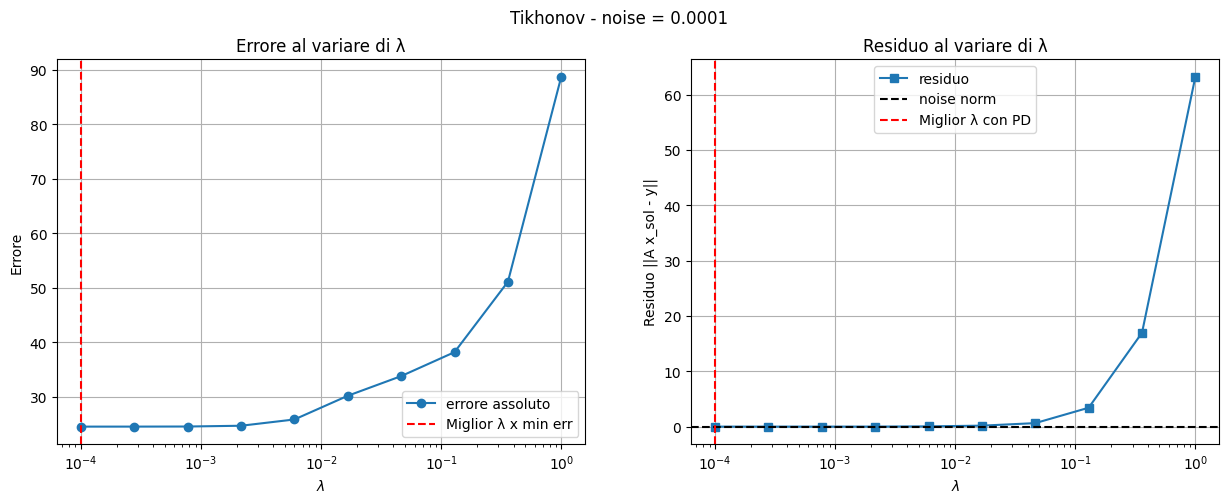


=== Tikhonov: Noise = 0.001 =========

---lmbda = 1.000e-04---
ER   = 0.1869813987046577
PSNR = 17.76526541034222
SSIM = 0.34340726620393747

---lmbda = 2.783e-04---
ER   = 0.1869477002928156
PSNR = 17.766830951445144
SSIM = 0.3435016572108816

---lmbda = 7.743e-04---
ER   = 0.18667607472209258
PSNR = 17.779460287711238
SSIM = 0.344275688508575

---lmbda = 2.154e-03---
ER   = 0.18539726860919395
PSNR = 17.83916686278102
SSIM = 0.34912552289835863

---lmbda = 5.995e-03---
ER   = 0.18889462789118291
PSNR = 17.676841356077862
SSIM = 0.3619859312565385

---lmbda = 1.668e-02---
ER   = 0.2186605092608988
PSNR = 16.405826388969395
SSIM = 0.35625363807593163

---lmbda = 4.642e-02---
ER   = 0.2445742358236627
PSNR = 15.43301938904085
SSIM = 0.34449394831681396

---lmbda = 1.292e-01---
ER   = 0.27631493758296305
PSNR = 14.373146223691133
SSIM = 0.3572020828226877

---lmbda = 3.594e-01---
ER   = 0.36956236493450983
PSNR = 11.847478741431184
SSIM = 0.25895556051347474

---lmbda = 1.000e+00---
ER 

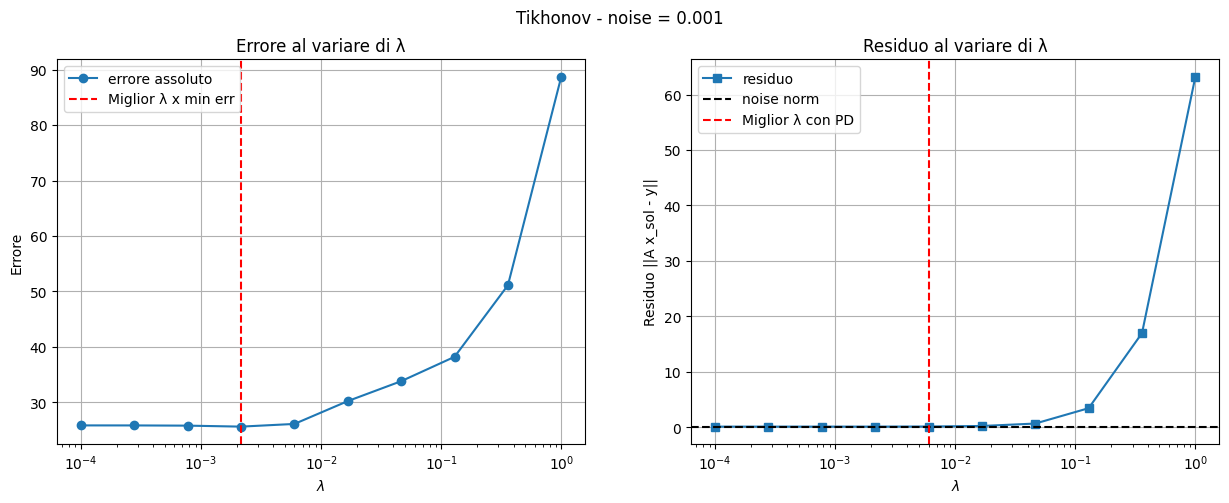


=== Tikhonov: Noise = 0.01 =========

---lmbda = 1.000e-04---
ER   = 0.7118673186167025
PSNR = 6.153252389693956
SSIM = 0.13202621581468066

---lmbda = 2.783e-04---
ER   = 0.7085976241855051
PSNR = 6.193239656233947
SSIM = 0.13246802736339328

---lmbda = 7.743e-04---
ER   = 0.6912627354666168
PSNR = 6.408370581765999
SSIM = 0.1350066816502605

---lmbda = 2.154e-03---
ER   = 0.5760116187866913
PSNR = 7.992608619666691
SSIM = 0.15480931038238563

---lmbda = 5.995e-03---
ER   = 0.31584319945680067
PSNR = 13.211802886486026
SSIM = 0.2354517198801438

---lmbda = 1.668e-02---
ER   = 0.22888689506461155
PSNR = 16.00881493732659
SSIM = 0.32854581728676613

---lmbda = 4.642e-02---
ER   = 0.24514007591689246
PSNR = 15.412947168679063
SSIM = 0.3415734365432186

---lmbda = 1.292e-01---
ER   = 0.27633470890500905
PSNR = 14.372524739456212
SSIM = 0.35689740798984687

---lmbda = 3.594e-01---
ER   = 0.36954805721946177
PSNR = 11.847815024698667
SSIM = 0.25858352032953374

---lmbda = 1.000e+00---
ER  

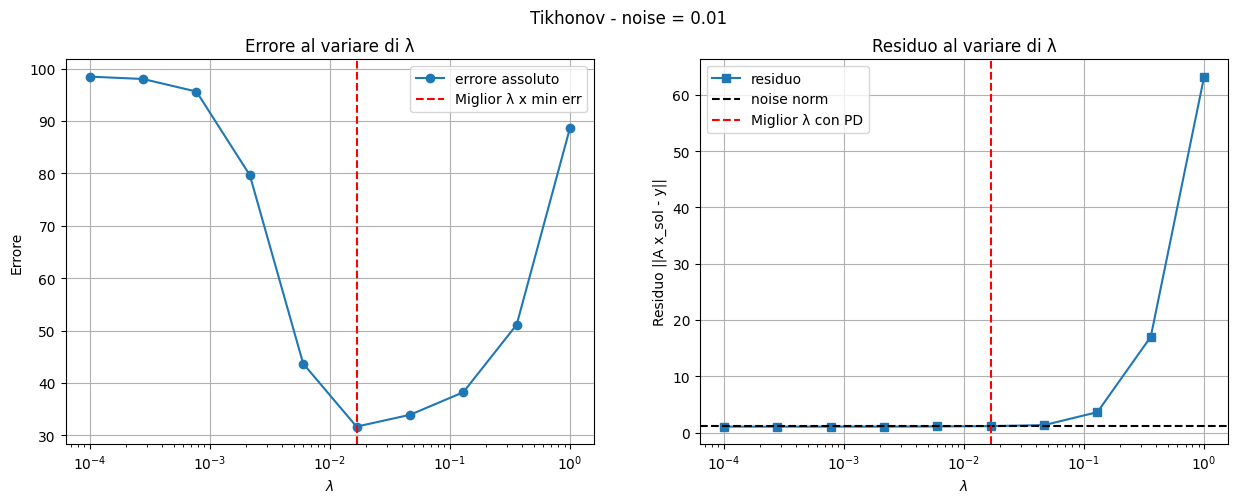

In [3]:
# Calcolo soluzione regolarizzata con il metodo di Tikhonov e lambda fissato
# Problema di minimo risolto con CGLS
x0 = np.zeros_like(x)
kmax = 200
tolf = 1e-8
tolx = 1e-8

# Scelta parametri Tikhonov (L e lambda)
L = operators.Identity()
lmbda_list=np.logspace(-4,0,10) #10 valori che vanno da 1e-4 a 1

for i, noise_level in enumerate(noise_lvl_list):
    err_list_lam = []
    resid_list_lam = []
    x_tik_list_lam=[]

    print(f"\n=== Tikhonov: Noise = {noise_level} =========")
    # Stima del "livello di rumore" (||y_delta - A(x)||)
    noise_norm = np.linalg.norm(y_delta_list[i] - A(x))

    for lmbda in lmbda_list:
        # Costruzione operatore di Tikhonov
        M = operators.TikhonovOperator(A, L, lmbda)

        # Definizione dati estesi ybar e ybar_delta
        ybar_delta_list=[]
        ybar = np.pad(y, ((0, 200), (0, 0)))
        ybar_delta = np.pad(y_delta_list[i], ((0, 200), (0, 0)))

        # Solver CGLS + Tikhonov
        cgls_tik_solver = solvers.CGLS(M)
        x_tik = cgls_tik_solver.solve(ybar_delta, x0, kmax, tolf, tolx)
        x_tik_list_lam.append(x_tik)

        #calcolo metriche errore
        print(f'\n---lmbda = {lmbda:.3e}---')
        print('ER   =',utilities.rel_err(x_tik,x))
        print('PSNR =',utilities.psnr(x_tik,x))
        print('SSIM =',utilities.ssim(x_tik,x))

        #Calcolo errore assoluto (||x_sol - x||) 
        err = np.linalg.norm(x_tik - x)  
        err_list_lam.append(err)

        # Calcolo residuo (||A x_sol - y_delta||)
        r = np.linalg.norm(A(x_tik) - y_delta_list[i])
        resid_list_lam.append(r)   

   #troviamo lambda che minimizza l'errore 
    idx_best = np.argmin(err_list_lam)
    lmbda_best = lmbda_list[idx_best]
    x_best= x_tik_list_lam[idx_best]
    print("\nlambda come valore che MINIMIZZA l'ERRORE ASSOLUTO fra l’immagine_GT e la ricostruzione ")
    print(f"- lambda migliore = {lmbda_best:.3e}")

    #Principio di Discrepanza (DP): cerco lambda nella lista  (residuo - noise_norm)
    diff_dp = np.abs(resid_list_lam - noise_norm) #lista = lista residuo - noise_norm
    idx_dp = np.argmin(diff_dp) #cerco l'indice dell'ragomento minimo nella lista diff
    lmbda_best_dp = lmbda_list[idx_dp] 
    x_best_dp = x_tik_list_lam[idx_dp]
    print("\nlambda trovato con il PRINCIPIO DI DISCREPANZA ")
    print(f"- lmbda migliore = {lmbda_best_dp:.3e}")
        
    # plot dell' errore al variare del lambda 
    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    plt.suptitle(f"Tikhonov - noise = {noise_level}")
    plt.semilogx(lmbda_list, err_list_lam, 'o-', label='errore assoluto')
    plt.axvline(lmbda_best, color='r', linestyle='--', label='Miglior λ x min err')
    #plt.axvline(lmbda_best_dp,   color='g', linestyle=':',  label='lmbda miglore con PD')
    plt.xlabel(r'$\lambda$')
    plt.ylabel('Errore')
    plt.title(f"Errore al variare di λ")
    plt.grid(True)
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.semilogx(lmbda_list, resid_list_lam, 's-', label='residuo')
    plt.axhline(noise_norm, color='k', linestyle='--', label='noise norm')
    #plt.axvline(lmbda_best, color='r', linestyle='--')
    plt.axvline(lmbda_best_dp,   color='r', linestyle='--', label='Miglior λ con PD' )
    plt.xlabel(r'$\lambda$')
    plt.ylabel('Residuo ||A x_sol - y||')
    plt.title("Residuo al variare di λ")
    plt.grid(True)
    plt.legend()
    plt.show()



- Calcolare la soluzione regolarizzata con Total Variation. Calcolare
il valore di λ come valore che minimizza l’errore assoluto (in norma 2)
fra l’immagine ground truth e la ricostruzione (su una griglia di
valori di λ) visualizzando il grafico relativo.


===Total Variation: Noise level = 0 ===

---lmbda = 1.000e-04---
ER   = 0.24783090669528493
PSNR = 15.318124178593557
SSIM = 0.3375175939795038

---lmbda = 2.783e-04---
ER   = 0.24880916209118495
PSNR = 15.283906120366307
SSIM = 0.33580727852992304

---lmbda = 7.743e-04---
ER   = 0.25114491591340476
PSNR = 15.202745676135905
SSIM = 0.3334276291777908

---lmbda = 2.154e-03---
ER   = 0.2588346928893869
PSNR = 14.940783763273506
SSIM = 0.32960563012365585

---lmbda = 5.995e-03---
ER   = 0.28879768290864566
PSNR = 13.989359404519712
SSIM = 0.31602505612152054

---lmbda = 1.668e-02---
ER   = 0.32233189699875564
PSNR = 13.035167811435635
SSIM = 0.25604694720754606

---lmbda = 4.642e-02---
ER   = 0.35208168472952966
PSNR = 12.268364820187594
SSIM = 0.21617546726651354

---lmbda = 1.292e-01---
ER   = 0.37299661146845253
PSNR = 11.767135765280187
SSIM = 0.2068598897361728

---lmbda = 3.594e-01---
ER   = 0.44109852377319986
PSNR = 10.310521407324016
SSIM = 0.20952036488941422

---lmbda = 1.000e

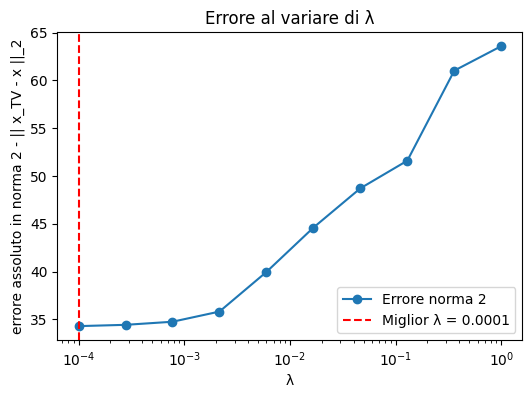


===Total Variation: Noise level = 0.0001 ===

---lmbda = 1.000e-04---
ER   = 0.2478304984392256
PSNR = 15.318138487018778
SSIM = 0.33751575153188174

---lmbda = 2.783e-04---
ER   = 0.24881814081339212
PSNR = 15.28359268020844
SSIM = 0.3358225994810308

---lmbda = 7.743e-04---
ER   = 0.2511233705974984
PSNR = 15.203490856515876
SSIM = 0.3333949146987486

---lmbda = 2.154e-03---
ER   = 0.2588483704604283
PSNR = 14.940324787962084
SSIM = 0.3295286070007537

---lmbda = 5.995e-03---
ER   = 0.2888324047191176
PSNR = 13.988315172854444
SSIM = 0.3158408601321286

---lmbda = 1.668e-02---
ER   = 0.32289134165459393
PSNR = 13.02010550287071
SSIM = 0.2554790058951473

---lmbda = 4.642e-02---
ER   = 0.3520815761473383
PSNR = 12.2683674989213
SSIM = 0.21617557392260184

---lmbda = 1.292e-01---
ER   = 0.3729966644226343
PSNR = 11.767134532147951
SSIM = 0.20685979229826656

---lmbda = 3.594e-01---
ER   = 0.4410986980052332
PSNR = 10.310517976435378
SSIM = 0.2095207331994473

---lmbda = 1.000e+00---
E

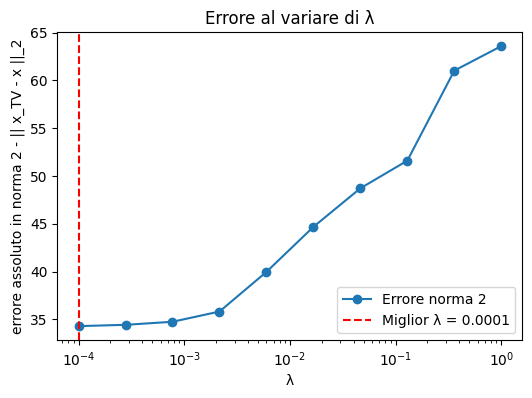


===Total Variation: Noise level = 0.001 ===

---lmbda = 1.000e-04---
ER   = 0.24782911799313848
PSNR = 15.318186868617627
SSIM = 0.3374358164305329

---lmbda = 2.783e-04---
ER   = 0.2488183955853277
PSNR = 15.283583786484794
SSIM = 0.33576304519423456

---lmbda = 7.743e-04---
ER   = 0.25113458982411246
PSNR = 15.203102813032688
SSIM = 0.33332343692561506

---lmbda = 2.154e-03---
ER   = 0.25886295198191805
PSNR = 14.939835505688512
SSIM = 0.3294530935621993

---lmbda = 5.995e-03---
ER   = 0.28882758520823004
PSNR = 13.988460108423498
SSIM = 0.31560423520157305

---lmbda = 1.668e-02---
ER   = 0.3241272964341053
PSNR = 12.986921358741778
SSIM = 0.25420690403566726

---lmbda = 4.642e-02---
ER   = 0.35208226311131446
PSNR = 12.26835055146405
SSIM = 0.2161716480638841

---lmbda = 1.292e-01---
ER   = 0.37299851867893113
PSNR = 11.767091352604922
SSIM = 0.20685139624398047

---lmbda = 3.594e-01---
ER   = 0.44110008173730664
PSNR = 10.310490728734848
SSIM = 0.20951808926900076

---lmbda = 1.00

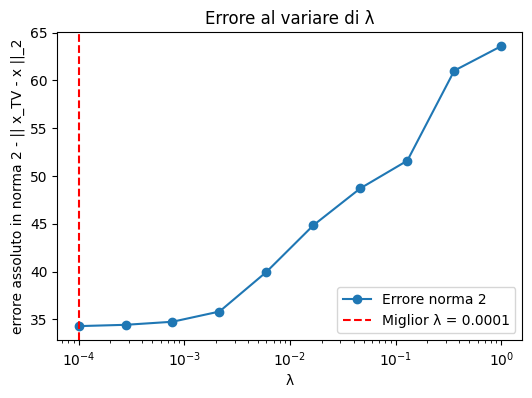


===Total Variation: Noise level = 0.01 ===

---lmbda = 1.000e-04---
ER   = 0.2480978877656479
PSNR = 15.308772157244723
SSIM = 0.33596425951150366

---lmbda = 2.783e-04---
ER   = 0.2490270220342268
PSNR = 15.276303990979361
SSIM = 0.3345906624468417

---lmbda = 7.743e-04---
ER   = 0.2512703853508591
PSNR = 15.19840737789303
SSIM = 0.3327183383185918

---lmbda = 2.154e-03---
ER   = 0.2589121887810971
PSNR = 14.938183570817865
SSIM = 0.32868298179499794

---lmbda = 5.995e-03---
ER   = 0.2892161205923548
PSNR = 13.976783565832136
SSIM = 0.3153428988200952

---lmbda = 1.668e-02---
ER   = 0.32567021875094637
PSNR = 12.945672576351361
SSIM = 0.2525434819127412

---lmbda = 4.642e-02---
ER   = 0.35224600097113606
PSNR = 12.264312068051895
SSIM = 0.2160817982318583

---lmbda = 1.292e-01---
ER   = 0.37310039426937835
PSNR = 11.764719334295874
SSIM = 0.20687291073351133

---lmbda = 3.594e-01---
ER   = 0.44139880116431385
PSNR = 10.304610508090729
SSIM = 0.20960082178327985

---lmbda = 1.000e+00-

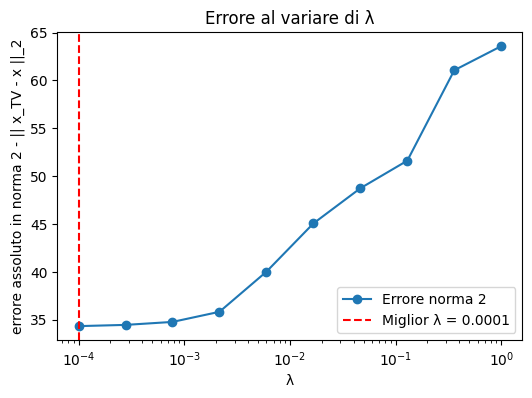

In [4]:
# Calcolo soluzione regolarizzata con Total Variation
# problema di minimo risolto con Discesa Gradiente

# Solver per Total Variation
gd_tv_solver = solvers.GDTotalVariation(A, beta=1e-3)

for i, noise_level in enumerate(noise_lvl_list):
    # Vettore per salvare l'errore in norma 2 su ciascun lambda
    err_n2_lam = []

    print(f"\n===Total Variation: Noise level = {noise_level} ===")
    
    # Calcola la soluzione TV per tutti i lambda nella griglia
    for lmbda in lmbda_list:
        # Risolvi il problema di minimi quadrati + regolarizzazione TV
        x_TV, obj_val_temp, grad_norm_temp = gd_tv_solver.solve(y_delta_list[i], lmbda, x0, kmax, tolf, tolx)
        
        #calcolo metriche errore
        print(f'\n---lmbda = {lmbda:.3e}---')
        print('ER   =',utilities.rel_err(x_TV,x))
        print('PSNR =',utilities.psnr(x_TV,x))
        print('SSIM =',utilities.ssim(x_TV,x))

        # Errore in norma 2 tra la soluzione ricostruita e l'immagine ground truth
        err = np.linalg.norm(x_TV - x)
        err_n2_lam.append(err)

    # Trova il lambda che minimizza l'errore
    best_idx = np.argmin(err_n2_lam)
    lmbda_best_tv = lmbda_list[best_idx]
    err_min = err_n2_lam[best_idx]

    print(f"\nMiglior lambda = {lmbda_best_tv:.3e}")
    print(f"Errore minimo in norma 2 = {err_min:.3e}")

    # Visualizza il grafico Errore al variare di lmbda
    plt.figure(figsize=(6, 4))
    plt.plot(lmbda_list, err_n2_lam, marker='o', label='Errore norma 2')
    plt.axvline(x=lmbda_best_tv, color='r', linestyle='--', label=f'Miglior λ = {lmbda_best_tv}')
    plt.title(f"Errore al variare di λ")
    plt.xlabel("λ")
    plt.ylabel("errore assoluto in norma 2 - || x_TV - x ||_2")
    plt.xscale("log")  # utile se vuoi scala log per λ
    plt.legend()
    plt.show()


Ripetere i punti precedenti per diversi livelli di rumore (tre-quattro) nell’intervallo
[0, 0.01] (provare entrambi gli estremi dell’intervallo) e con due diversi valori dei parametri del nucleo gaussiano della Point Spread Function.

N.B: Controllare che i metodi iterativi di minimizzazione (CGLS e gradiente) escano per raggiunto criterio di arresto e non per numero massimo
di iterazioni. In tal caso aumentare il numero massimo di iterazioni.

Riportare in un documento pdf i risultati ottenuti in termini di immagini, grafici (visualizzare per esempio il grafico dell’ errore al variare delle
iterazioni nei diversi casi), tabelle con le metriche di valutazione viste a
lezione, che verrà poi eventualmente discusso durante la prova orale.